In [1]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [35]:
data=pd.read_csv(r"C:\Users\Sony\Desktop\Documents1.csv",encoding = "ISO-8859-1")

In [74]:
data.describe()

,Unnamed: 0
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
Unnamed: 0                      0 non-null float64
question                        25 non-null object
answer                          25 non-null object
question_punctuation_removed    25 non-null object
question_stopword_removed       25 non-null object
question_negated                25 non-null object
question_descriptive            25 non-null object
question_stemmed                25 non-null object
modified_sentence               25 non-null object
dtypes: float64(1), object(8)
memory usage: 1.8+ KB


In [36]:
print ("Let's explore our question set",data["question"])
print ("Length of training set",len(data["question"]))
print ("Unique answers are",set(data["answer"])," and number of unique answers are ", len(set(data["answer"])))

Let's explore our question set 0                        how are you doing today ?
1                                how is your day ?
2                                         good day
3                                     good morning
4     Hope you have a lovely and beautiful morning
5                What a beautiful and pleasant day
6                          Have a pleasant morning
7                            what a lovely morning
8                          how is it going today ?
9                                  have a nice day
10                                   see you later
11                                      good night
12                                         bye bye
13                               talk to you later
14                          see you sometime later
15                                 have a nice day
16                                talk to you soon
17                              make me a sandwich
18                      can you make a sandwitch ?


In [37]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [38]:
##### Let's change the list of questions into list of words for better visualization
word_list=[]
list_question=list(data["question"])
for sentence in list_question:
	words_sentence=sentence.split()
	for words in words_sentence:
		word_list.append(words)


word_list=[word for sentence in list(data["question"]) for word in sentence.split()]
print(word_list)

['how', 'are', 'you', 'doing', 'today', '?', 'how', 'is', 'your', 'day', '?', 'good', 'day', 'good', 'morning', 'Hope', 'you', 'have', 'a', 'lovely', 'and', 'beautiful', 'morning', 'What', 'a', 'beautiful', 'and', 'pleasant', 'day', 'Have', 'a', 'pleasant', 'morning', 'what', 'a', 'lovely', 'morning', 'how', 'is', 'it', 'going', 'today', '?', 'have', 'a', 'nice', 'day', 'see', 'you', 'later', 'good', 'night', 'bye', 'bye', 'talk', 'to', 'you', 'later', 'see', 'you', 'sometime', 'later', 'have', 'a', 'nice', 'day', 'talk', 'to', 'you', 'soon', 'make', 'me', 'a', 'sandwich', 'can', 'you', 'make', 'a', 'sandwitch', '?', 'having', 'a', 'sandwitch', 'today', '?', "what's", 'for', 'lunch?', 'I', 'want', 'to', 'eat', 'a', 'sandwitch', 'today', 'I', 'do', 'not', 'want', 'a', 'sandwitch', 'today', 'What', 'is', 'in', 'the', 'menu', 'What', 'is', 'for', 'lunch']


In [39]:
##### Now let's find the frequency of each word and the most common words in the corpus
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'a': 11, 'you': 7, 'today': 5, '?': 5, 'day': 5, 'is': 4, 'morning': 4, 'sandwitch': 4, 'how': 3, 'good': 3, 'have': 3, 'What': 3, 'later': 3, 'to': 3, 'lovely': 2, 'and': 2, 'beautiful': 2, 'pleasant': 2, 'nice': 2, 'see': 2, 'bye': 2, 'talk': 2, 'make': 2, 'for': 2, 'I': 2, 'want': 2, 'are': 1, 'doing': 1, 'your': 1, 'Hope': 1, 'Have': 1, 'what': 1, 'it': 1, 'going': 1, 'night': 1, 'sometime': 1, 'soon': 1, 'me': 1, 'sandwich': 1, 'can': 1, 'having': 1, "what's": 1, 'lunch?': 1, 'eat': 1, 'do': 1, 'not': 1, 'in': 1, 'the': 1, 'menu': 1, 'lunch': 1})
[('a', 11), ('you', 7), ('today', 5), ('?', 5), ('day', 5)]


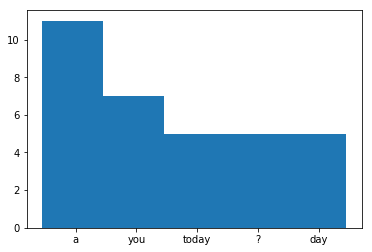

In [40]:
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
    labels.append(T[0])
    values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

In [41]:
### Remove Punctuations and change words to lower case
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]    
    return words

data["question_punctuation_removed"]=data["question"].apply(remove_punctuations)
print (data["question_punctuation_removed"])

0                         [how, are, you, doing, today]
1                                  [how, is, your, day]
2                                           [good, day]
3                                       [good, morning]
4     [hope, you, have, a, lovely, and, beautiful, m...
5              [what, a, beautiful, and, pleasant, day]
6                          [have, a, pleasant, morning]
7                            [what, a, lovely, morning]
8                           [how, is, it, going, today]
9                                  [have, a, nice, day]
10                                    [see, you, later]
11                                        [good, night]
12                                           [bye, bye]
13                               [talk, to, you, later]
14                          [see, you, sometime, later]
15                                 [have, a, nice, day]
16                                [talk, to, you, soon]
17                              [make, me, a, sa

In [42]:
### Remove StopWords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stop]
	return modified_word_list

data["question_stopword_removed"]=data["question_punctuation_removed"].apply(remove_stopwords)
print (data["question_stopword_removed"])

{'ourselves', "you'll", 'between', "that'll", 'below', 'their', 'your', 'will', 'didn', 'her', 'll', 'are', 'themselves', 'on', 'most', 'how', "doesn't", 'about', 'until', 'more', 'while', 'then', 'don', "should've", 'am', 'mustn', 'such', 'hasn', 'and', 'its', 'for', 'shan', 'over', 'isn', 'by', 'yourselves', 'few', 'myself', 'o', 'wasn', 'than', "she's", 'what', "didn't", 'were', 'to', "you've", 'is', "wouldn't", "shouldn't", 'who', 'a', 'into', 'down', 'too', 'but', 'haven', "aren't", 'against', 'yourself', 're', 'did', 'just', 'if', 'be', 'other', 'aren', 'have', 'these', 'own', "hasn't", 'mightn', 'won', 'does', 'above', 'do', 'we', 'weren', 'you', 'not', 'y', 'with', 'that', 'once', 'the', 'there', 'herself', 'had', 'itself', 'they', 'all', 'hers', 's', 'she', 'out', "weren't", "you're", 'me', "wasn't", 't', 'should', 'during', 'm', 'himself', 'at', 'again', 'in', "you'd", 'before', 'shouldn', 've', 'further', 'those', 'which', 'or', 'wouldn', "haven't", 'this', 'hadn', "won't", 

In [43]:
def negation_handling(words):
    counter=False    
    wlist=[]    
    negations=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:       
    for i,j in enumerate(words):                           
            if j in negations and i<len(words)-1:             
                wlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:                
                    wlist.append(words[i])
                else:
                    counter=False
    return wlist

data["question_negated"]=data["question_punctuation_removed"].apply(negation_handling)
print (data["question_negated"])

0                         [how, are, you, doing, today]
1                                  [how, is, your, day]
2                                           [good, day]
3                                       [good, morning]
4     [hope, you, have, a, lovely, and, beautiful, m...
5              [what, a, beautiful, and, pleasant, day]
6                          [have, a, pleasant, morning]
7                            [what, a, lovely, morning]
8                           [how, is, it, going, today]
9                                  [have, a, nice, day]
10                                    [see, you, later]
11                                        [good, night]
12                                           [bye, bye]
13                               [talk, to, you, later]
14                          [see, you, sometime, later]
15                                 [have, a, nice, day]
16                                [talk, to, you, soon]
17                              [make, me, a, sa

In [44]:
from nltk.tag import pos_tag
def descriptive_words(words):
    meaningful_words=[]    
    tags=['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH',"NN",'NNP']    
    tagged_word=pos_tag(words)
    for word in tagged_word:            
        if word[1] in tags:
            meaningful_words.append(word[0])
    return meaningful_words 
data["question_descriptive"]=data["question_negated"].apply(descriptive_words)
print (data["question_descriptive"])

0                          [are, doing, today]
1                                        [day]
2                                  [good, day]
3                              [good, morning]
4     [hope, have, lovely, beautiful, morning]
5                   [beautiful, pleasant, day]
6                    [have, pleasant, morning]
7                            [lovely, morning]
8                               [going, today]
9                            [have, nice, day]
10                                [see, later]
11                               [good, night]
12                                  [bye, bye]
13                               [talk, later]
14                      [see, sometime, later]
15                           [have, nice, day]
16                                [talk, soon]
17                            [make, sandwich]
18                           [make, sandwitch]
19                  [having, sandwitch, today]
20                                     [lunch]
21           

In [45]:
### Stemming of Words
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
	stemmed_words=[st.stem(word) for word in text] 
	return stemmed_words

data["question_stemmed"]=data["question_descriptive"].apply(Stemming)
print (data["question_stemmed"])

0                     [are, do, today]
1                                [day]
2                          [good, day]
3                         [good, morn]
4     [hope, have, love, beauti, morn]
5              [beauti, pleasant, day]
6               [have, pleasant, morn]
7                         [love, morn]
8                          [go, today]
9                    [have, nice, day]
10                        [see, later]
11                       [good, night]
12                          [bye, bye]
13                       [talk, later]
14               [see, sometim, later]
15                   [have, nice, day]
16                        [talk, soon]
17                    [make, sandwich]
18                   [make, sandwitch]
19            [have, sandwitch, today]
20                             [lunch]
21    [i, want, eat, sandwitch, today]
22    [do, not-want, sandwitch, today]
23                              [menu]
24                             [lunch]
Name: question_stemmed, d

In [46]:
### Recreating the sentence
def Recreate(text):
	word=" ".join(text)
	return word

data["modified_sentence"]=data["question_stemmed"].apply(Recreate)
print (data["modified_sentence"])

0                    are do today
1                             day
2                        good day
3                       good morn
4      hope have love beauti morn
5             beauti pleasant day
6              have pleasant morn
7                       love morn
8                        go today
9                   have nice day
10                      see later
11                     good night
12                        bye bye
13                     talk later
14              see sometim later
15                  have nice day
16                      talk soon
17                  make sandwich
18                 make sandwitch
19           have sandwitch today
20                          lunch
21     i want eat sandwitch today
22    do not-want sandwitch today
23                           menu
24                          lunch
Name: modified_sentence, dtype: object


In [47]:
def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    #text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_unnegated=negation_handling(text_punctuation_removed)
    text_descriptive=descriptive_words(text_unnegated)
    text_stemmed=Stemming(text_descriptive)
    final_text=Recreate(text_stemmed)
    return final_text
data["modified_sentence"]=data["question"].apply(Cleaning)
print (data["modified_sentence"])

0                    are do today
1                             day
2                        good day
3                       good morn
4      hope have love beauti morn
5             beauti pleasant day
6              have pleasant morn
7                       love morn
8                        go today
9                   have nice day
10                      see later
11                     good night
12                        bye bye
13                     talk later
14              see sometim later
15                  have nice day
16                      talk soon
17                  make sandwich
18                 make sandwitch
19           have sandwitch today
20                          lunch
21     i want eat sandwitch today
22    do not-want sandwitch today
23                           menu
24                          lunch
Name: modified_sentence, dtype: object


In [48]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["question"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
['and', 'are', 'beautiful', 'bye', 'can', 'day', 'do', 'doing', 'eat', 'for', 'going', 'good', 'have', 'having', 'hope', 'how', 'in', 'is', 'it', 'later', 'lovely', 'lunch', 'make', 'me', 'menu', 'morning', 'nice', 'night', 'not', 'pleasant', 'sandwich', 'sandwitch', 'see', 'sometime', 'soon', 'talk', 'the', 'to', 'today', 'want', 'what', 'you', 'your']


In [49]:
###### Extra Tf-idf transformation and DataPipelines
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
model = Pipeline([('vectoizer', CountVectorizer()),
 ('tfidf', TfidfTransformer())])

X_train = model.fit_transform(data["modified_sentence"]).toarray()

In [50]:
print(X_train)

[[0.66458888 0.         0.         0.         0.58900082 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.45978218 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.65152087 0.         0.
  0.         0.75863071 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.7350886  0.         0.         0.         0.
  0.         0.    

In [79]:
Y=data["answer"]
question="have a nice day"

In [80]:
### Let's create our first Classification model

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict1=clf1.predict(P)
print (predict1)

['goodbye']


C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [81]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

['goodbye']


In [82]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict3=clf3.predict(P)
print (predict3)

['goodbye']


In [92]:
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print (graph)
graph.write_pdf("iris.pdf")
from IPython.display import Image

#Image(graph.create_png())

In [84]:
final_predict=[]
final_predict=list(predict1)+list(predict2)+list(predict3)
final_predict = Counter(final_predict)
print ("Thus answer to your question is",final_predict.most_common(1)[0][0])

Thus answer to your question is goodbye


In [85]:
def Predict(text):
    P=model.transform([Cleaning(text)])
    predict1=clf1.predict(P)
    #print (predict1)

    predict2=clf2.predict(P)
    #print (predict2)
    
    predict3=clf3.predict(P)
    #print (predict3)
    
    final_predict=[]
    final_predict=list(predict1)+list(predict2)+list(predict3)
    final_predict = Counter(final_predict)
    print ("Class of Question belongs to = ",final_predict.most_common(1)[0][0])
    
    return final_predict.most_common(1)[0][0]

In [86]:
##### Finding the most similar sentence
#from sklearn.metrics.pairwise import linear_kernel

#cosine_similarities = linear_kernel(X_train[1], X_train).flatten()
#print ("Cosine Similarity of",data["question"][0],"with all questions in Corpus",cosine_similarities)
#index=[i+1 for i in range(len(X))]
#print (index)
#print ("top 3 most similar question's to",data["question"][0],"are :")
#print (sorted(zip(cosine_similarities, index, data["question"][index]), reverse=True)[:3])
#print ("Thus answer to your question is ", max(data["answer"][index[0]],data["answer"][index[1]],data["answer"][index[3]]))

In [87]:
###### Generate Answers ######
answer_dictionary={"greeting":["Have a happy day","Good morning","Have a pleasant day","Good Day"],
                  "sandwitch":["What kind of Sandwitch do you like","Sandwitches are great","Sandwitches are delicious","I love sandwitch too"],
                  "goodbye":["Goodbye","Have a good day","Was nice meeting you","See you later"]}

In [88]:
import random

def generate_answer(predict_class):
    ans=random.choice(answer_dictionary[predict_class])
    return ans

In [94]:
###### The ChatBot #######
question = input("Enter Question =")
prediction=Predict(question)
ans=generate_answer(prediction)
print("Answer = ",ans)

Enter Question =good day
Class of Question belongs to =  greeting
Answer =  Have a happy day


In [90]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(data["question"], data["answer"], random_state=0)

X_test=["have a nice day","what's for lunch","how are you"]
Y_test=["greeting","sandwitch","greeting"]

Y_pred=[]
for i in X_test:
    prediction=Predict(i)
    print(prediction)
    Y_pred.append(prediction)
print (Y_pred)
print (Y_test)
cnf_matrix = confusion_matrix(Y_test,Y_pred)
print (cnf_matrix)

Class of Question belongs to =  goodbye
goodbye
Class of Question belongs to =  sandwitch
sandwitch
Class of Question belongs to =  greeting
greeting
['goodbye', 'sandwitch', 'greeting']
['greeting', 'sandwitch', 'greeting']
[[0 0 0]
 [1 1 0]
 [0 0 1]]


[[0 0 0]
 [1 1 0]
 [0 0 1]]


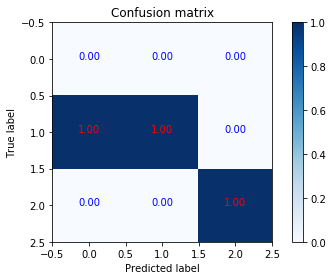

In [91]:
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "blue")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')